<a href="https://colab.research.google.com/github/ArshT/Pytorch_Practice/blob/master/DCGAN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import sys
from os.path import exists

%matplotlib inline
import os

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [14]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

img_transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = MNIST(root='./data/', download=True, train=True, transform=img_transform)
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)

test_dataset = MNIST(root='./data/', download=True, train=False, transform=img_transform)
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=True)

In [15]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.deconv1 = nn.ConvTranspose2d(100,1024,4,1,0)
        self.deconv1_bn = nn.BatchNorm2d(1024)
        self.deconv2 = nn.ConvTranspose2d(1024,512, 4, 2, 1)
        self.deconv2_bn = nn.BatchNorm2d(512)
        self.deconv3 = nn.ConvTranspose2d(512,256, 4, 2, 1)
        self.deconv3_bn = nn.BatchNorm2d(256)
        self.deconv4 = nn.ConvTranspose2d(256,128, 4, 2, 1)
        self.deconv4_bn = nn.BatchNorm2d(128)
        self.deconv5 = nn.ConvTranspose2d(128, 1, 4, 2, 1)

    def forward(self, input):
        # x = F.relu(self.deconv1(input))
        x = F.leaky_relu(self.deconv1_bn(self.deconv1(input)), 0.2)
        x = F.leaky_relu(self.deconv2_bn(self.deconv2(x)), 0.2)
        x = F.leaky_relu(self.deconv3_bn(self.deconv3(x)), 0.2)
        x = F.leaky_relu(self.deconv4_bn(self.deconv4(x)), 0.2)
        x = torch.tanh(self.deconv5(x))

        return x

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(1, 128, 4, 2, 1)
        self.conv2 = nn.Conv2d(128,256, 4, 2, 1)
        self.conv2_bn = nn.BatchNorm2d(256)
        self.conv3 = nn.Conv2d(256,512, 4, 2, 1)
        self.conv3_bn = nn.BatchNorm2d(512)
        self.conv4 = nn.Conv2d(512,1024, 4, 2, 1)
        self.conv4_bn = nn.BatchNorm2d(1024)
        self.conv5 = nn.Conv2d(1024, 1, 4, 1, 0)

    def forward(self, input):
        x = F.leaky_relu(self.conv1(input), 0.2)
        x = F.leaky_relu(self.conv2_bn(self.conv2(x)), 0.2)
        x = F.leaky_relu(self.conv3_bn(self.conv3(x)), 0.2)
        x = F.leaky_relu(self.conv4_bn(self.conv4(x)), 0.2)
        x = torch.sigmoid(self.conv5(x))
        return x
    
generator = Generator()
discriminator = Discriminator()

device = torch.device("cuda:0" if True and torch.cuda.is_available() else "cpu")
generator = generator.to(device)
discriminator = discriminator.to(device)

print(generator)
print("")
print(discriminator)

Generator(
  (deconv1): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1))
  (deconv1_bn): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv2): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (deconv2_bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (deconv3_bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv4): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (deconv4_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv5): ConvTranspose2d(128, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
)

Discriminator(
  (conv1): Conv2d(1, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=

Training ...
Batch: 50 Generator Loss: 2.1102853798866272 Discriminator Loss: 0.32645632028579713
Batch: 100 Generator Loss: 2.110294749736786 Discriminator Loss: 0.32629437565803526
Batch: 150 Generator Loss: 2.1026595544815065 Discriminator Loss: 0.32596435010433195
Batch: 200 Generator Loss: 2.1044476556777956 Discriminator Loss: 0.3260309660434723
Batch: 250 Generator Loss: 2.093200674057007 Discriminator Loss: 0.32590208411216737
Batch: 300 Generator Loss: 2.0910991072654723 Discriminator Loss: 0.32571707367897035
Batch: 350 Generator Loss: 2.096287820339203 Discriminator Loss: 0.32580413937568664
Batch: 400 Generator Loss: 2.090190360546112 Discriminator Loss: 0.32560132443904877
Batch: 450 Generator Loss: 2.092977690696716 Discriminator Loss: 0.3257396686077118


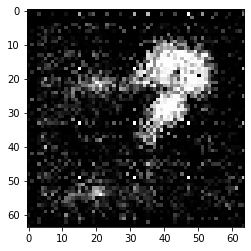

Epoch [1 / 20] average loss generator vs. discrim.: 2.098675 vs. 0.325932

Batch: 50 Generator Loss: 2.0895070791244508 Discriminator Loss: 0.3254653525352478
Batch: 100 Generator Loss: 2.094897499084473 Discriminator Loss: 0.3258729612827301
Batch: 150 Generator Loss: 2.0947861576080324 Discriminator Loss: 0.32590261042118074
Batch: 200 Generator Loss: 2.088769509792328 Discriminator Loss: 0.3254993140697479
Batch: 250 Generator Loss: 2.097701382637024 Discriminator Loss: 0.3257725441455841
Batch: 300 Generator Loss: 2.094783742427826 Discriminator Loss: 0.32582311928272245
Batch: 350 Generator Loss: 2.0989169239997865 Discriminator Loss: 0.3259992682933807
Batch: 400 Generator Loss: 2.095342152118683 Discriminator Loss: 0.32593422174453734
Batch: 450 Generator Loss: 2.1061190605163573 Discriminator Loss: 0.32609093248844145


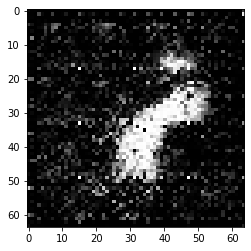

Epoch [2 / 20] average loss generator vs. discrim.: 2.096109 vs. 0.325851

Batch: 50 Generator Loss: 2.0987536787986754 Discriminator Loss: 0.325807768702507
Batch: 100 Generator Loss: 2.091389410495758 Discriminator Loss: 0.32569826126098633
Batch: 150 Generator Loss: 2.0995435690879822 Discriminator Loss: 0.3259979200363159
Batch: 200 Generator Loss: 2.0953138089179992 Discriminator Loss: 0.3257258093357086
Batch: 250 Generator Loss: 2.0916553258895876 Discriminator Loss: 0.3254933923482895
Batch: 300 Generator Loss: 2.0912309193611147 Discriminator Loss: 0.3256898844242096
Batch: 350 Generator Loss: 2.0917538809776306 Discriminator Loss: 0.3255696713924408
Batch: 400 Generator Loss: 2.091802296638489 Discriminator Loss: 0.3255540978908539
Batch: 450 Generator Loss: 2.0941881561279296 Discriminator Loss: 0.3255059731006622


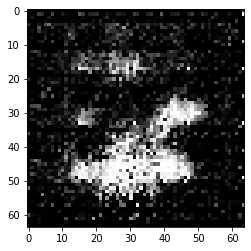

Epoch [3 / 20] average loss generator vs. discrim.: 2.093925 vs. 0.325658

Batch: 50 Generator Loss: 2.1137813448905947 Discriminator Loss: 0.326228563785553
Batch: 100 Generator Loss: 2.1116644191741942 Discriminator Loss: 0.3266268879175186
Batch: 150 Generator Loss: 2.0923906326293946 Discriminator Loss: 0.3254349339008331
Batch: 200 Generator Loss: 2.0980880951881407 Discriminator Loss: 0.3258002138137817
Batch: 250 Generator Loss: 2.092734112739563 Discriminator Loss: 0.32557143092155455
Batch: 300 Generator Loss: 2.0964771819114687 Discriminator Loss: 0.3257084631919861
Batch: 350 Generator Loss: 2.091114015579224 Discriminator Loss: 0.32550612032413484
Batch: 400 Generator Loss: 2.0985633277893068 Discriminator Loss: 0.3258733785152435
Batch: 450 Generator Loss: 2.096391179561615 Discriminator Loss: 0.3258012306690216


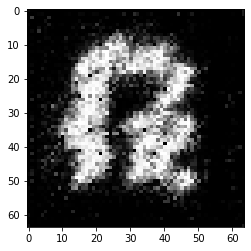

Epoch [4 / 20] average loss generator vs. discrim.: 2.099074 vs. 0.325831

Batch: 50 Generator Loss: 2.100689105987549 Discriminator Loss: 0.32601324081420896
Batch: 100 Generator Loss: 2.0916539812088013 Discriminator Loss: 0.3255308711528778
Batch: 150 Generator Loss: 2.089711263179779 Discriminator Loss: 0.325453422665596
Batch: 200 Generator Loss: 2.089396667480469 Discriminator Loss: 0.32549673080444336
Batch: 250 Generator Loss: 2.313435261249542 Discriminator Loss: 0.3469411963224411
Batch: 300 Generator Loss: 2.6324771571159364 Discriminator Loss: 0.3652581971883774
Batch: 350 Generator Loss: 2.2386008286476136 Discriminator Loss: 0.37207575142383575
Batch: 400 Generator Loss: 2.2019134664535525 Discriminator Loss: 0.357394882440567
Batch: 450 Generator Loss: 2.052613167762756 Discriminator Loss: 0.3553605985641479


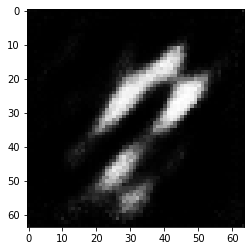

Epoch [5 / 20] average loss generator vs. discrim.: 2.195302 vs. 0.344192

Batch: 50 Generator Loss: 2.0767095947265624 Discriminator Loss: 0.35223836481571197
Batch: 100 Generator Loss: 2.0815812134742737 Discriminator Loss: 0.35486585974693297
Batch: 150 Generator Loss: 2.050098352432251 Discriminator Loss: 0.34798577904701233
Batch: 200 Generator Loss: 1.9923227047920227 Discriminator Loss: 0.35855850219726565
Batch: 250 Generator Loss: 1.995372908115387 Discriminator Loss: 0.3480585062503815
Batch: 300 Generator Loss: 1.9718254566192628 Discriminator Loss: 0.3548586720228195
Batch: 350 Generator Loss: 1.9729446172714233 Discriminator Loss: 0.3476448506116867
Batch: 400 Generator Loss: 1.9628991150856019 Discriminator Loss: 0.34614799499511717
Batch: 450 Generator Loss: 1.9703605580329895 Discriminator Loss: 0.34909327507019045


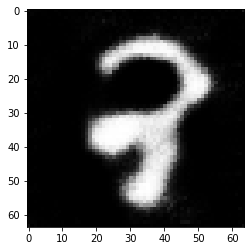

Epoch [6 / 20] average loss generator vs. discrim.: 2.006581 vs. 0.350732

Batch: 50 Generator Loss: 1.9651844310760498 Discriminator Loss: 0.3534466105699539
Batch: 100 Generator Loss: 1.9990665161609649 Discriminator Loss: 0.3610759145021439
Batch: 150 Generator Loss: 1.8883077681064606 Discriminator Loss: 0.3613159120082855
Batch: 200 Generator Loss: 1.990450325012207 Discriminator Loss: 0.3413180631399155
Batch: 250 Generator Loss: 2.0020322751998902 Discriminator Loss: 0.34667016863822936
Batch: 300 Generator Loss: 1.9907440590858458 Discriminator Loss: 0.3539605051279068
Batch: 350 Generator Loss: 1.9667168164253235 Discriminator Loss: 0.3490891182422638
Batch: 400 Generator Loss: 1.9792923259735107 Discriminator Loss: 0.34309556961059573
Batch: 450 Generator Loss: 1.9498878073692323 Discriminator Loss: 0.3528417038917542


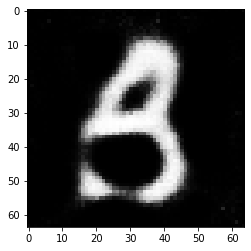

Epoch [7 / 20] average loss generator vs. discrim.: 1.971056 vs. 0.351070

Batch: 50 Generator Loss: 1.9551227974891663 Discriminator Loss: 0.35753877520561217
Batch: 100 Generator Loss: 1.9787729120254516 Discriminator Loss: 0.34176668643951413
Batch: 150 Generator Loss: 1.996679081916809 Discriminator Loss: 0.34657965898513793
Batch: 200 Generator Loss: 1.975069785118103 Discriminator Loss: 0.341520756483078
Batch: 250 Generator Loss: 1.9975862979888916 Discriminator Loss: 0.34593224167823794
Batch: 300 Generator Loss: 2.0046672224998474 Discriminator Loss: 0.3449343568086624
Batch: 350 Generator Loss: 2.0186437821388243 Discriminator Loss: 0.34091959238052366
Batch: 400 Generator Loss: 2.0083158206939697 Discriminator Loss: 0.34384156584739684
Batch: 450 Generator Loss: 2.010650641918182 Discriminator Loss: 0.34003319025039674


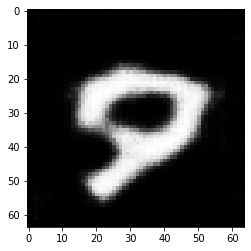

Epoch [8 / 20] average loss generator vs. discrim.: 1.995643 vs. 0.344759

Batch: 50 Generator Loss: 2.000208485126495 Discriminator Loss: 0.3453412330150604
Batch: 100 Generator Loss: 2.0317671275138856 Discriminator Loss: 0.33620793104171753
Batch: 150 Generator Loss: 2.038238408565521 Discriminator Loss: 0.34593391597270967
Batch: 200 Generator Loss: 1.9995958948135375 Discriminator Loss: 0.3423701721429825
Batch: 250 Generator Loss: 2.026824080944061 Discriminator Loss: 0.3379357439279556
Batch: 300 Generator Loss: 2.0551728129386904 Discriminator Loss: 0.33864437639713285
Batch: 350 Generator Loss: 2.028240275382996 Discriminator Loss: 0.34174243807792665
Batch: 400 Generator Loss: 2.0489838218688963 Discriminator Loss: 0.33888195276260374
Batch: 450 Generator Loss: 2.035466585159302 Discriminator Loss: 0.34600722074508666


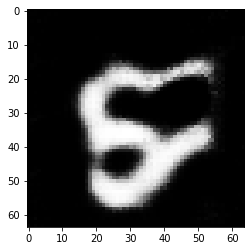

Epoch [9 / 20] average loss generator vs. discrim.: 2.030361 vs. 0.341750

Batch: 50 Generator Loss: 2.0436666345596315 Discriminator Loss: 0.3364370954036713
Batch: 100 Generator Loss: 2.043937795162201 Discriminator Loss: 0.3400621724128723
Batch: 150 Generator Loss: 2.0513717198371886 Discriminator Loss: 0.3384027242660522
Batch: 200 Generator Loss: 2.054016599655151 Discriminator Loss: 0.33648592948913575
Batch: 250 Generator Loss: 2.062350790500641 Discriminator Loss: 0.33480933010578157
Batch: 300 Generator Loss: 2.039274260997772 Discriminator Loss: 0.35383835196495056
Batch: 350 Generator Loss: 2.029731774330139 Discriminator Loss: 0.33538885951042174
Batch: 400 Generator Loss: 2.051060631275177 Discriminator Loss: 0.3370728731155396
Batch: 450 Generator Loss: 2.0537131929397585 Discriminator Loss: 0.33298190355300905


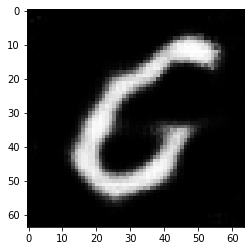

Epoch [10 / 20] average loss generator vs. discrim.: 2.048950 vs. 0.338898

Batch: 50 Generator Loss: 2.036562864780426 Discriminator Loss: 0.3358030313253403
Batch: 100 Generator Loss: 2.047870147228241 Discriminator Loss: 0.3357497173547745
Batch: 150 Generator Loss: 2.0513085746765136 Discriminator Loss: 0.3367948907613754
Batch: 200 Generator Loss: 2.0627200388908387 Discriminator Loss: 0.33478558659553526
Batch: 250 Generator Loss: 2.0664895391464233 Discriminator Loss: 0.3327733600139618
Batch: 300 Generator Loss: 2.0608103132247924 Discriminator Loss: 0.34299890041351316
Batch: 350 Generator Loss: 2.037957401275635 Discriminator Loss: 0.3381159287691116
Batch: 400 Generator Loss: 2.061379654407501 Discriminator Loss: 0.33571715772151944
Batch: 450 Generator Loss: 2.0531788158416746 Discriminator Loss: 0.33462495386600494


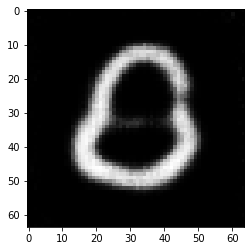

Epoch [11 / 20] average loss generator vs. discrim.: 2.053603 vs. 0.336411

Batch: 50 Generator Loss: 2.0641351413726805 Discriminator Loss: 0.3363967502117157
Batch: 100 Generator Loss: 2.0489168190956115 Discriminator Loss: 0.3347025215625763
Batch: 150 Generator Loss: 2.065575513839722 Discriminator Loss: 0.33478593587875366
Batch: 200 Generator Loss: 2.043351831436157 Discriminator Loss: 0.33727847278118134
Batch: 250 Generator Loss: 2.0667047691345215 Discriminator Loss: 0.3383910810947418
Batch: 300 Generator Loss: 2.0484677076339723 Discriminator Loss: 0.3362846350669861
Batch: 350 Generator Loss: 2.0646096420288087 Discriminator Loss: 0.3388661360740662
Batch: 400 Generator Loss: 2.0796051120758055 Discriminator Loss: 0.3361333441734314
Batch: 450 Generator Loss: 2.0554892206192017 Discriminator Loss: 0.3332939976453781


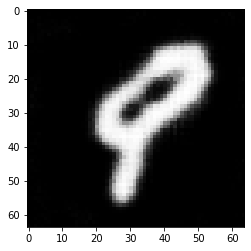

Epoch [12 / 20] average loss generator vs. discrim.: 2.059345 vs. 0.336205

Batch: 50 Generator Loss: 2.075007829666138 Discriminator Loss: 0.3312877482175827
Batch: 100 Generator Loss: 2.0691744828224183 Discriminator Loss: 0.3342946070432663
Batch: 150 Generator Loss: 1.8320834302902222 Discriminator Loss: 0.46231344521045686
Batch: 200 Generator Loss: 1.8714045286178589 Discriminator Loss: 0.3560604727268219
Batch: 250 Generator Loss: 1.993143765926361 Discriminator Loss: 0.33739363253116605
Batch: 300 Generator Loss: 2.025663857460022 Discriminator Loss: 0.33919026613235476
Batch: 350 Generator Loss: 2.0347060799598693 Discriminator Loss: 0.3342456811666489
Batch: 400 Generator Loss: 2.047328162193298 Discriminator Loss: 0.3325172835588455
Batch: 450 Generator Loss: 2.0700464963912966 Discriminator Loss: 0.3336059415340424


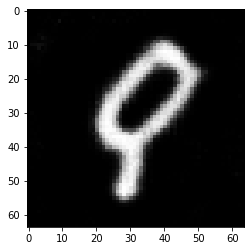

Epoch [13 / 20] average loss generator vs. discrim.: 2.005483 vs. 0.350500

Batch: 50 Generator Loss: 2.0453377604484557 Discriminator Loss: 0.33349488854408266
Batch: 100 Generator Loss: 2.056019220352173 Discriminator Loss: 0.33738191306591037
Batch: 150 Generator Loss: 2.0532391715049743 Discriminator Loss: 0.33405891716480257
Batch: 200 Generator Loss: 2.056278848648071 Discriminator Loss: 0.33316481709480283
Batch: 250 Generator Loss: 2.047996983528137 Discriminator Loss: 0.33323687613010405
Batch: 300 Generator Loss: 2.0688835978507996 Discriminator Loss: 0.33680820882320406
Batch: 350 Generator Loss: 2.058928463459015 Discriminator Loss: 0.3334930169582367
Batch: 400 Generator Loss: 2.0432493185997007 Discriminator Loss: 0.3359027659893036
Batch: 450 Generator Loss: 2.0674220371246337 Discriminator Loss: 0.3328661948442459


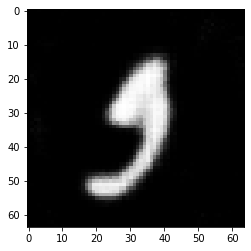

Epoch [14 / 20] average loss generator vs. discrim.: 2.053968 vs. 0.334687

Batch: 50 Generator Loss: 2.0577611207962034 Discriminator Loss: 0.33275648891925813
Batch: 100 Generator Loss: 2.0618835520744323 Discriminator Loss: 0.3377796483039856
Batch: 150 Generator Loss: 2.0676953101158144 Discriminator Loss: 0.33169684052467346
Batch: 200 Generator Loss: 2.0554196882247924 Discriminator Loss: 0.3408886796236038
Batch: 250 Generator Loss: 2.0619065809249877 Discriminator Loss: 0.3314640146493912
Batch: 300 Generator Loss: 2.074826428890228 Discriminator Loss: 0.33135922372341153
Batch: 350 Generator Loss: 2.0627128291130066 Discriminator Loss: 0.33255285561084746
Batch: 400 Generator Loss: 2.0771125531196595 Discriminator Loss: 0.3316288071870804
Batch: 450 Generator Loss: 2.075855746269226 Discriminator Loss: 0.33509581387042997


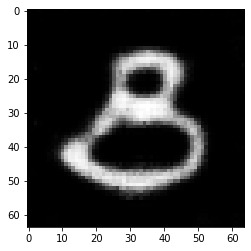

Epoch [15 / 20] average loss generator vs. discrim.: 2.065006 vs. 0.333816

Batch: 50 Generator Loss: 2.0653016686439516 Discriminator Loss: 0.33398115277290347
Batch: 100 Generator Loss: 2.0584787583351134 Discriminator Loss: 0.33438183188438414
Batch: 150 Generator Loss: 2.053043429851532 Discriminator Loss: 0.35059268414974215
Batch: 200 Generator Loss: 2.0476841068267824 Discriminator Loss: 0.3321811252832413
Batch: 250 Generator Loss: 2.0704563665390014 Discriminator Loss: 0.33143919944763184
Batch: 300 Generator Loss: 2.0734982180595396 Discriminator Loss: 0.3314651840925217
Batch: 350 Generator Loss: 2.061727957725525 Discriminator Loss: 0.3320683115720749
Batch: 400 Generator Loss: 2.074142200946808 Discriminator Loss: 0.33308890759944915
Batch: 450 Generator Loss: 2.0669759798049925 Discriminator Loss: 0.33319835007190707


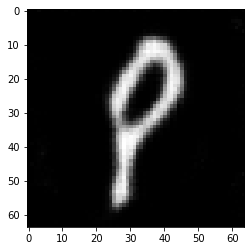

Epoch [16 / 20] average loss generator vs. discrim.: 2.062243 vs. 0.335204

Batch: 50 Generator Loss: 2.0647396659851074 Discriminator Loss: 0.33288227081298827
Batch: 100 Generator Loss: 2.070385847091675 Discriminator Loss: 0.33306030809879306
Batch: 150 Generator Loss: 2.072124471664429 Discriminator Loss: 0.33396179139614107
Batch: 200 Generator Loss: 2.068342981338501 Discriminator Loss: 0.33544476211071017
Batch: 250 Generator Loss: 2.0674667286872865 Discriminator Loss: 0.3312059360742569
Batch: 300 Generator Loss: 2.070077199935913 Discriminator Loss: 0.3370391190052032
Batch: 350 Generator Loss: 2.0702131938934327 Discriminator Loss: 0.33426870703697203
Batch: 400 Generator Loss: 2.066186225414276 Discriminator Loss: 0.33105403900146485
Batch: 450 Generator Loss: 2.0734859251976014 Discriminator Loss: 0.3327701449394226


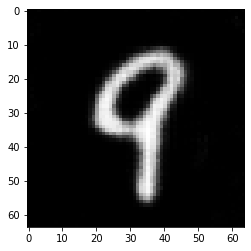

Epoch [17 / 20] average loss generator vs. discrim.: 2.069438 vs. 0.333416

Batch: 50 Generator Loss: 2.0777758049964903 Discriminator Loss: 0.3346273398399353
Batch: 100 Generator Loss: 2.071303417682648 Discriminator Loss: 0.3328776043653488
Batch: 150 Generator Loss: 2.076608963012695 Discriminator Loss: 0.3316887503862381
Batch: 200 Generator Loss: 2.0869646954536436 Discriminator Loss: 0.3311627781391144
Batch: 250 Generator Loss: 2.0703417754173277 Discriminator Loss: 0.3349841004610062
Batch: 300 Generator Loss: 2.0648808598518373 Discriminator Loss: 0.3330492854118347
Batch: 350 Generator Loss: 2.0648380160331725 Discriminator Loss: 0.33179401636123657
Batch: 400 Generator Loss: 2.077294874191284 Discriminator Loss: 0.33154211699962616
Batch: 450 Generator Loss: 2.0724505615234374 Discriminator Loss: 0.33390622198581693


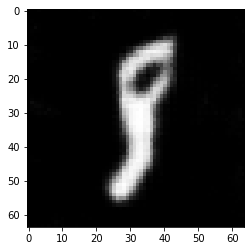

Epoch [18 / 20] average loss generator vs. discrim.: 2.072741 vs. 0.332696

Batch: 50 Generator Loss: 2.085033359527588 Discriminator Loss: 0.3314511489868164
Batch: 100 Generator Loss: 2.061991722583771 Discriminator Loss: 0.34084183871746065
Batch: 150 Generator Loss: 2.0729022240638733 Discriminator Loss: 0.32969839036464693
Batch: 200 Generator Loss: 2.065037260055542 Discriminator Loss: 0.3320736575126648
Batch: 250 Generator Loss: 2.0761242604255674 Discriminator Loss: 0.33045720994472505
Batch: 300 Generator Loss: 2.0778333020210265 Discriminator Loss: 0.3309067893028259
Batch: 350 Generator Loss: 2.0720267868041993 Discriminator Loss: 0.33486846923828123
Batch: 400 Generator Loss: 2.070849561691284 Discriminator Loss: 0.33281440019607544
Batch: 450 Generator Loss: 2.0783570432662963 Discriminator Loss: 0.3305957305431366


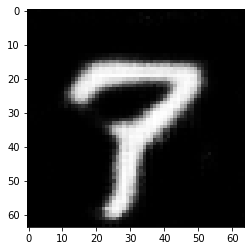

Epoch [19 / 20] average loss generator vs. discrim.: 2.073224 vs. 0.332626

Batch: 50 Generator Loss: 2.076746413707733 Discriminator Loss: 0.3313417536020279
Batch: 100 Generator Loss: 2.0758696818351745 Discriminator Loss: 0.33352241694927215
Batch: 150 Generator Loss: 2.070284216403961 Discriminator Loss: 0.3323495727777481
Batch: 200 Generator Loss: 2.071093406677246 Discriminator Loss: 0.3324172532558441
Batch: 250 Generator Loss: 2.078859248161316 Discriminator Loss: 0.33152192533016206
Batch: 300 Generator Loss: 2.07840784072876 Discriminator Loss: 0.33283816516399384
Batch: 350 Generator Loss: 2.076007170677185 Discriminator Loss: 0.33136086821556093
Batch: 400 Generator Loss: 2.073691871166229 Discriminator Loss: 0.3314193934202194
Batch: 450 Generator Loss: 2.075830614566803 Discriminator Loss: 0.3328370749950409


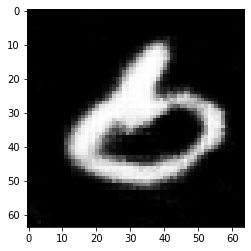

Epoch [20 / 20] average loss generator vs. discrim.: 2.074204 vs. 0.332168



In [20]:
learning_rate = 1e-5
num_epochs = 40

gen_optimizer = torch.optim.Adam(params=generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
disc_optimizer = torch.optim.Adam(params=discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))


generator.train()
discriminator.train()

gen_loss_avg = []
disc_loss_avg = []

print('Training ...')
for epoch in range(num_epochs):
    gen_loss_avg.append(0)
    disc_loss_avg.append(0)
    num_batches = 0
    running_loss_1 = 0.0
    running_loss_2 = 0.0

    generator.train()
    discriminator.train()
    
    for i,(image_batch, _) in enumerate(train_dataloader):
        
        image_batch = image_batch.to(device)
        label_real = torch.ones(image_batch.size(0), device=device)*0.9
        label_fake = torch.ones(image_batch.size(0), device=device)*0.1

        latent = torch.randn(image_batch.size(0), 100, 1, 1, device=device)
        fake_image_batch = generator(latent)
        
        real_pred = discriminator(image_batch).squeeze()
        fake_pred = discriminator(fake_image_batch.detach()).squeeze()
        disc_loss = 0.5 * (
            F.binary_cross_entropy(real_pred, label_real) +
            F.binary_cross_entropy(fake_pred, label_fake))
        
        disc_optimizer.zero_grad()
        disc_loss.backward()
        disc_optimizer.step()
        
        fake_pred = discriminator(fake_image_batch).squeeze()
        gen_loss = F.binary_cross_entropy(fake_pred, label_real)
        
        gen_optimizer.zero_grad()
        gen_loss.backward()
        gen_optimizer.step()
        
        gen_loss_avg[-1] += gen_loss.item()
        disc_loss_avg[-1] += disc_loss.item()
        num_batches += 1

        running_loss_1 += gen_loss.item()
        running_loss_2 += disc_loss.item()

        if i%50 == 49:
          print("Batch:",i+1,"Generator Loss:",running_loss_1/50,"Discriminator Loss:",running_loss_2/50)
          running_loss_1 = 0.0
          running_loss_2 = 0.0
        
    gen_loss_avg[-1] /= num_batches
    disc_loss_avg[-1] /= num_batches
    generator.eval()
    z = torch.randn(1, 100, 1, 1, device=device)
    epoch_pred = generator(z)
    img = epoch_pred.view(64, 64).detach().cpu().numpy()

    plt.imshow((img+1.)/2.,cmap='gray')
    plt.show()
    print('Epoch [%d / %d] average loss generator vs. discrim.: %f vs. %f' %(epoch+1, num_epochs, gen_loss_avg[-1], disc_loss_avg[-1]))
    print("")

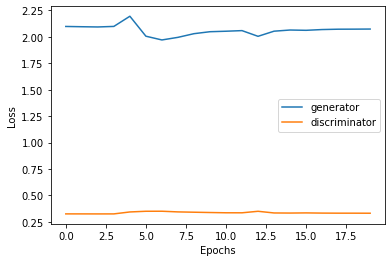

In [21]:
import matplotlib.pyplot as plt
plt.ion()

fig = plt.figure()
plt.plot(gen_loss_avg, label='generator')
plt.plot(disc_loss_avg, label='discriminator')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

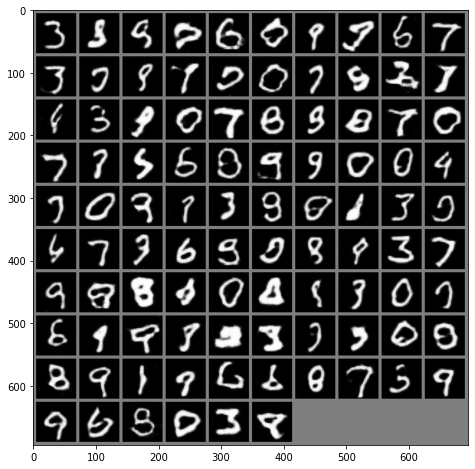

In [25]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

import torchvision.utils

generator.eval()

def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    return x

def show_image(img):
    img = to_img(img)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

with torch.no_grad():

    # sample latent vectors from the standard normal distribution
    latent = torch.randn(image_batch.size(0), 100, 1, 1, device=device)
    fake_image_batch = generator(latent)
    fake_image_batch = fake_image_batch.cpu()

    fig, ax = plt.subplots(figsize=(8, 8))
    show_image(torchvision.utils.make_grid(fake_image_batch.data[:100],10,5))
    plt.show()

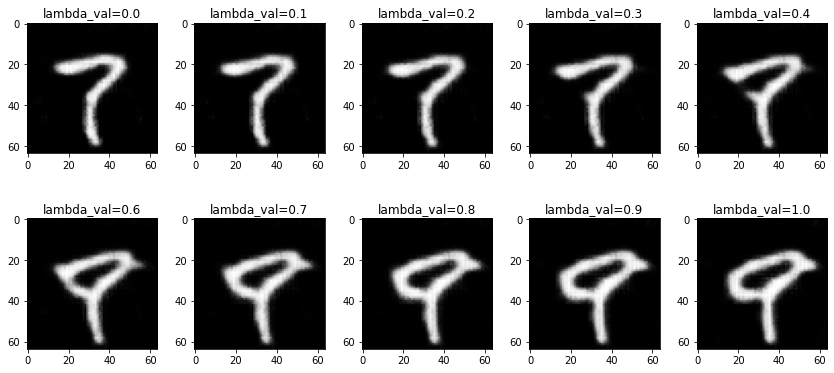

In [24]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

import torchvision.utils

generator.eval()

def interpolation(lambda1, model, latent_1, latent_2):

    with torch.no_grad():

        # interpolation of the two latent vectors
        inter_latent = lambda1* latent_1 + (1- lambda1) * latent_2

        # reconstruct interpolated image
        inter_latent = inter_latent.to(device)
        inter_image = model(inter_latent)
        inter_image = inter_image.cpu()

        return inter_image
    
# sample two latent vectors from the standard normal distribution
latent_1 = torch.randn(1, 100, 1, 1, device=device)
latent_2 = torch.randn(1, 100, 1, 1, device=device)

# interpolation lambdas
lambda_range=np.linspace(0,1,10)

fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for ind,l in enumerate(lambda_range):
    inter_image=interpolation(float(l), generator, latent_1, latent_2)
   
    inter_image = to_img(inter_image)
    
    image = inter_image.numpy()
   
    axs[ind].imshow(image[0,0,:,:], cmap='gray')
    axs[ind].set_title('lambda_val='+str(round(l,1)))
plt.show() 

In [26]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [27]:
PATH = '/content/gdrive/My Drive/Pytorch_Practice/DCGAN_MNIST_generator.pt'
torch.save(generator,PATH)

PATH = '/content/gdrive/My Drive/Pytorch_Practice/DCGAN_MNIST_discriminator.pt'
torch.save(discriminator,PATH)